<a href="https://colab.research.google.com/github/gaso/tipologia_heart-attack-analysis/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 100%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">Tipología y ciclo de vida de los datos</p>
<p style="margin: 0; text-align:right;">2023-1 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
<p style="margin: 0; text-align:right; padding-button: 100px;"><b>Integrantes:</b> Gustavo Salgado Ocampo - Carlos Andres Rivera Rivera</p>

</div>
<div style="width:100%;">&nbsp;</div>

<h1>Análisis y predicción de ataques al corazón</h1>

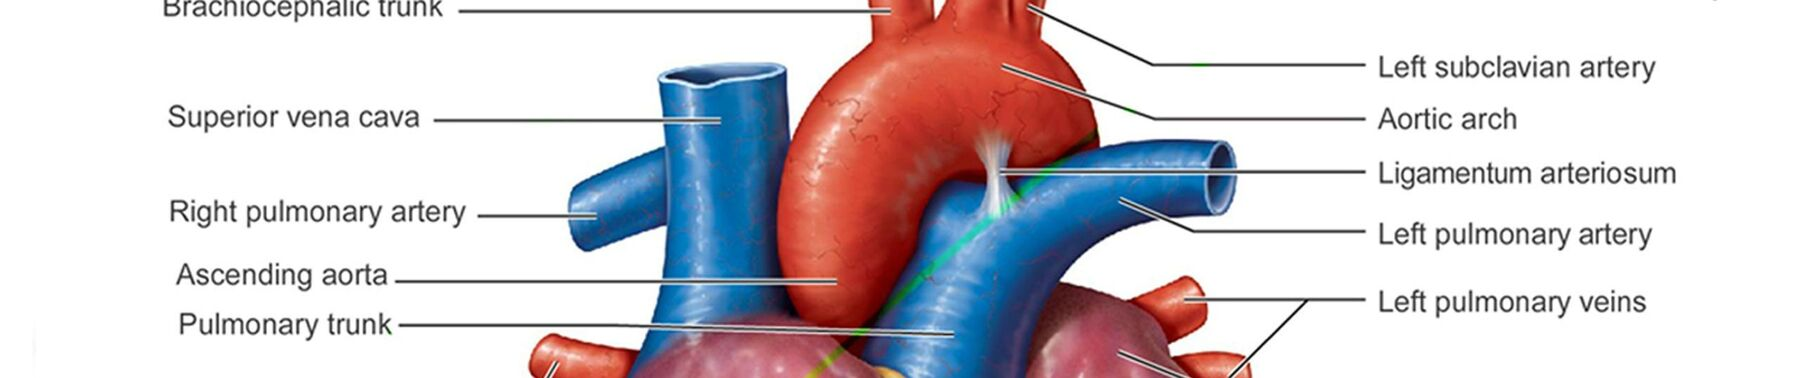

<h2>Tabla de contenido</h2>

1. [Descripción del dataset](#descripcion-dataset)
2. [Integración y selección ](#integracion-y-seleccion)
3. [Limpieza de los datos](#limpieza-de-los-datos)

Cargue de Librerias

In [ ]:
install.packages('ggplot2')
install.packages("corrplot")
install.packages("gridExtra")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Usar librerias

In [ ]:
library(dplyr)
library(ggplot2)
library(scales)
library(corrplot)
library(gridExtra)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.92 loaded


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




# 1. Descripción del dataset <a id="descripcion-dataset"></a>

**¿Por qué es importante y qué pregunta/problema
pretende responder?**

El conjunto de datos contiene información relevante sobre la salud 
cardiovascular de los pacientes, abarcando diferentes variables de interés. Su importancia radica en que nos brinda la oportunidad de analizar y comprender los posibles factores que pueden influir en la probabilidad de sufrir un ataque cardíaco.

El objetivo principal de este conjunto de datos es responder a la pregunta fundamental de cómo determinar la probabilidad de un ataque cardíaco en función de las características y mediciones específicas de cada paciente. A través del estudio de variables como la edad, el sexo, los síntomas de angina, la presión arterial, los niveles de colesterol, entre otros, podemos identificar posibles patrones o factores de riesgo asociados a las enfermedades cardiovasculares.

Esta información resulta valiosa para contribuir en la creación de estrategias de prevención y tratamiento de enfermedades cardíacas.

## 1.1 Carga del dataset

In [ ]:
path= 'https://raw.githubusercontent.com/gaso/tipologia_heart-attack-analysis/main/dataset/heart.csv'
data <- read.csv(path, row.names=NULL)

str(data)

'data.frame':	303 obs. of  14 variables:
 $ age     : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex     : int  1 1 0 1 0 1 0 1 1 1 ...
 $ cp      : int  3 2 1 1 0 0 1 1 2 2 ...
 $ trtbps  : int  145 130 130 120 120 140 140 120 172 150 ...
 $ chol    : int  233 250 204 236 354 192 294 263 199 168 ...
 $ fbs     : int  1 0 0 0 0 0 0 0 1 0 ...
 $ restecg : int  0 1 0 1 1 1 0 1 1 1 ...
 $ thalachh: int  150 187 172 178 163 148 153 173 162 174 ...
 $ exng    : int  0 0 0 0 1 0 0 0 0 0 ...
 $ oldpeak : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ slp     : int  0 0 2 2 2 1 1 2 2 2 ...
 $ caa     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ thall   : int  1 2 2 2 2 1 2 3 3 2 ...
 $ output  : int  1 1 1 1 1 1 1 1 1 1 ...


El conjunto de datos contiene **303** observaciones y **14** variables. 

- **age:** La edad del paciente (variable numérica).

- **sex:** El sexo del paciente (1: masculino, 0: femenino) (variable numérica).

- **cp:** Tipo de dolor en el pecho (variable numérica).
  - Value 0: typical angina
  - Value 1: atypical angina
  - Value 2: non-anginal pain
  - Value 3: asymptomatic

- **trtbps:** Presión arterial en reposo (variable numérica).

- **chol:** Nivel de colesterol en mg/dL (variable numérica).

- **fbs:** Nivel de azúcar en la sangre en ayunas (1: superior a 120 mg/dL, 0: inferior a 120 mg/dL) (variable numérica).

- **restecg:** Resultados del electrocardiograma en reposo (variable numérica).

- **thalachh:** Frecuencia cardíaca máxima alcanzada (variable numérica).

- **exng:** Angina inducida por ejercicio (1: sí, 0: no) (variable numérica).

- **oldpeak:** Depresión del ST inducida por el ejercicio en relación con el descanso (variable numérica).

- **slp:** Pendiente del segmento ST de ejercicio (variable numérica).

- **caa:** Número de vasos principales coloreados por fluoroscopia (variable numérica).

- **thall:** Resultados de las pruebas de estrés con talio (variable numérica).

- **output:** Variable de salida, 1 si la persona tiene enfermedad cardíaca y 0 si no la tiene (variable numérica).

Resumen de datos que contiene el dataset

In [ ]:
head(data)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [ ]:
# Obtener los nombres de las columnas del dataset
column_names <- colnames(data)

# Identificar las columnas categóricas
cat_cols <- column_names[sapply(data, function(x) is.factor(x) | is.character(x))]

# Identificar las columnas continuas
con_cols <- column_names[sapply(data, function(x) is.numeric(x))]

# Identificar la columna objetivo (si se conoce)
target_col <- "output"

# Imprimir la información
cat("Variables Categoricas Identificadas : ", cat_cols, "\n")
cat("Variables Continuas identificadas : ", con_cols, "\n")
cat("La Variable Objetivo es :  ", target_col, "\n")


Variables Categoricas Identificadas :   
Variables Continuas identificadas :  age sex cp trtbps chol fbs restecg thalachh exng oldpeak slp caa thall output 
La Variable Objetivo es :   output 


La información anterior muestra que la no identificación correcta de las variables categoricas ('sex','exng','caa','cp','fbs','restecg','slp','thall') con lo que realizaremos la transformación en base a la descripción del dataset

In [ ]:
data$sex <- as.factor(data$sex)
data$exng <- as.factor(data$exng)
data$caa <- as.factor(data$caa)
data$cp <- as.factor(data$cp)
data$fbs <- as.factor(data$fbs)
data$restecg <- as.factor(data$restecg)
data$slp <- as.factor(data$slp)
data$thall <- as.factor(data$thall)

Si repetimos la clasificación: 

In [ ]:
# Identificar las columnas categóricas
cat_cols <- column_names[sapply(data, function(x) is.factor(x) | is.character(x))]

# Identificar las columnas continuas
con_cols <- column_names[sapply(data, function(x) is.numeric(x))]

cat("Variables Categoricas Identificadas : ", cat_cols, "\n")
cat("Variables Continuas identificadas : ", con_cols, "\n")


Variables Categoricas Identificadas :  sex cp fbs restecg exng slp caa thall 
Variables Continuas identificadas :  age trtbps chol thalachh oldpeak output 


In [ ]:
summary(data)

      age        sex     cp          trtbps           chol       fbs    
 Min.   :29.00   0: 96   0:143   Min.   : 94.0   Min.   :126.0   0:258  
 1st Qu.:47.50   1:207   1: 50   1st Qu.:120.0   1st Qu.:211.0   1: 45  
 Median :55.00           2: 87   Median :130.0   Median :240.0          
 Mean   :54.37           3: 23   Mean   :131.6   Mean   :246.3          
 3rd Qu.:61.00                   3rd Qu.:140.0   3rd Qu.:274.5          
 Max.   :77.00                   Max.   :200.0   Max.   :564.0          
 restecg    thalachh     exng       oldpeak     slp     caa     thall  
 0:147   Min.   : 71.0   0:204   Min.   :0.00   0: 21   0:175   0:  2  
 1:152   1st Qu.:133.5   1: 99   1st Qu.:0.00   1:140   1: 65   1: 18  
 2:  4   Median :153.0           Median :0.80   2:142   2: 38   2:166  
         Mean   :149.6           Mean   :1.04           3: 20   3:117  
         3rd Qu.:166.0           3rd Qu.:1.60           4:  5          
         Max.   :202.0           Max.   :6.20            

## 3. Limpieza de los datos <a id="limpieza-de-los-datos"></a>

## 3.1 Comprobar valores nulos en conjunto de datos

In [ ]:
colSums(is.na(data))

sum(is.na(data))

age      sex       cp   trtbps     chol      fbs  restecg thalachh 
       0        0        0        0        0        0        0        0 
    exng  oldpeak      slp      caa    thall   output 
       0        0        0        0        0        0

[1] 0

## 3.2 Comprobar duplicados

In [ ]:
duplicated_rows <- data[duplicated(data), ]
duplicated_rows

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<int>
165,38,1,2,138,175,0,1,173,0,0,2,4,2,1


## 3.3 Eliminar los duplicados

In [ ]:
data <- distinct(data)

## 3.4 Comprobar tamaño despues del ajuste 

In [ ]:
dim(data)

[1] 302  14

## 3.5 Comprobar valores extremos

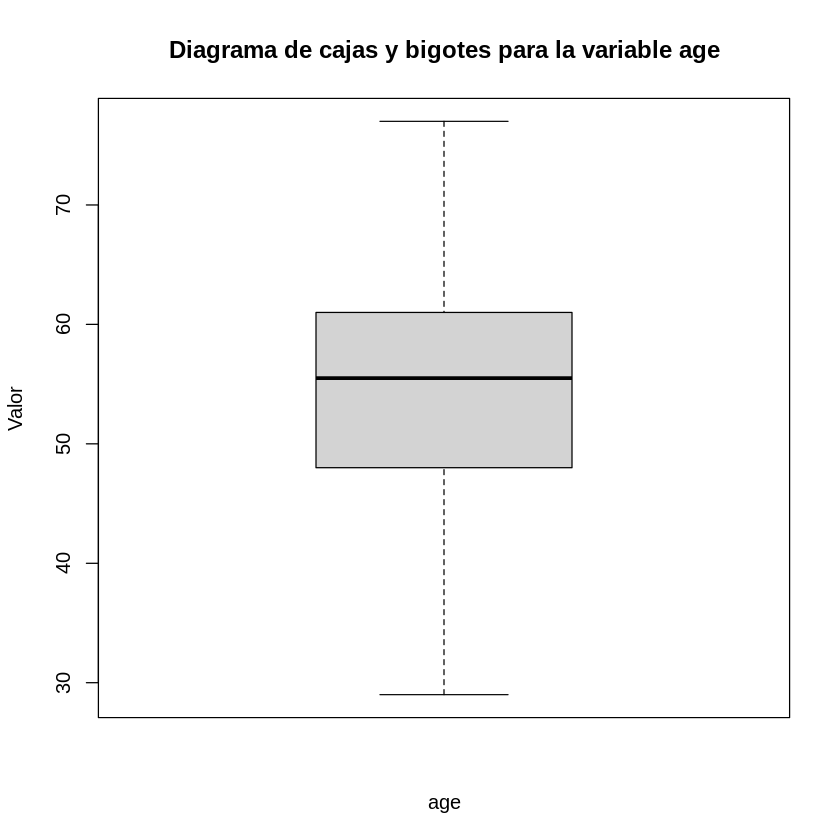

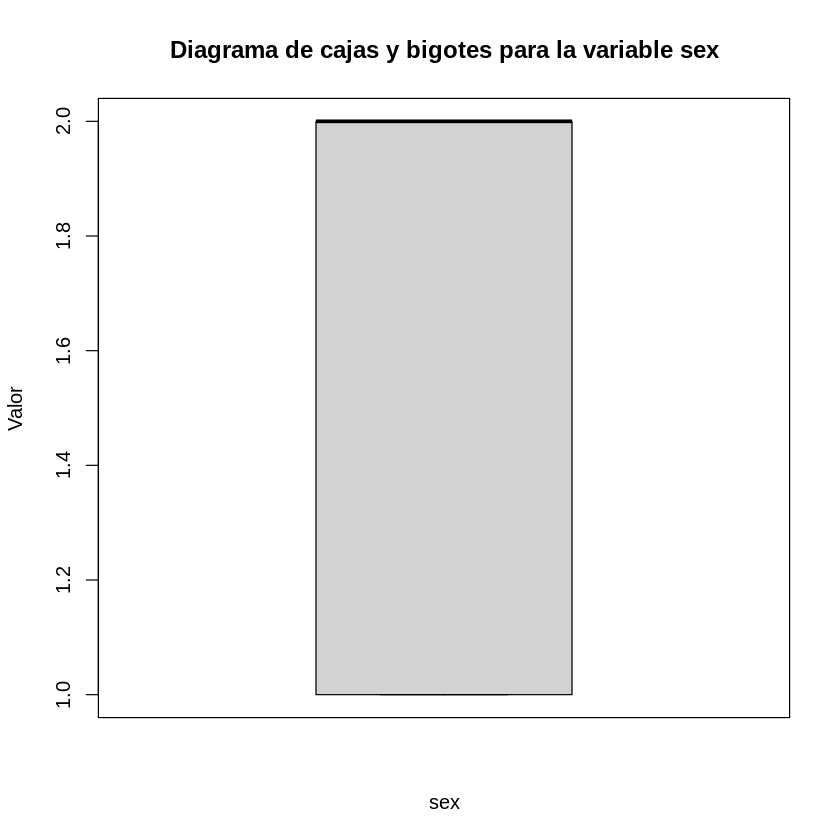

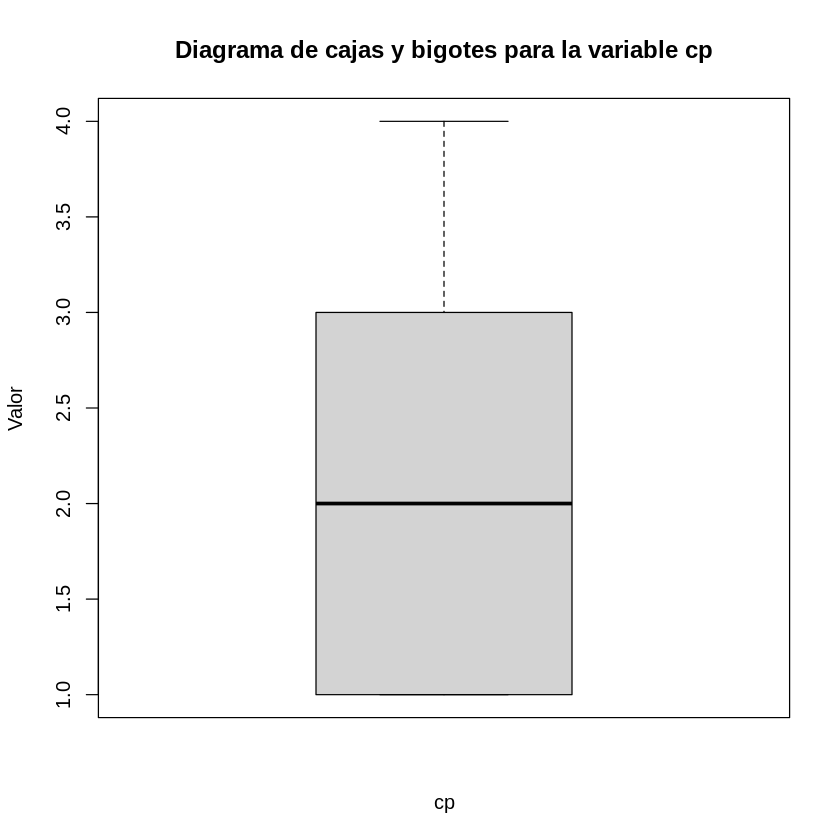

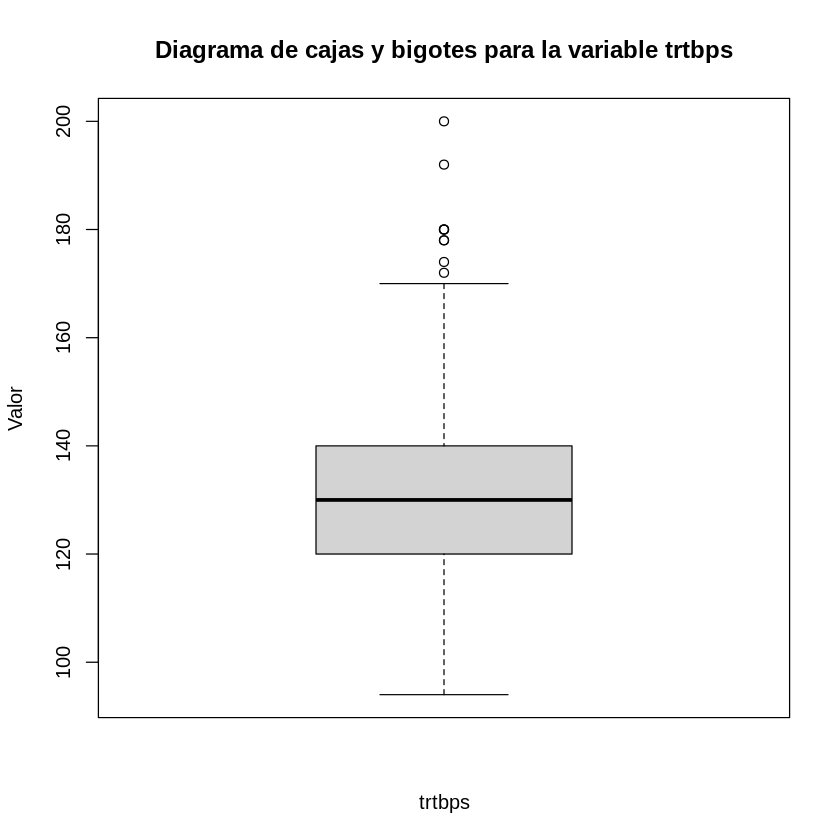

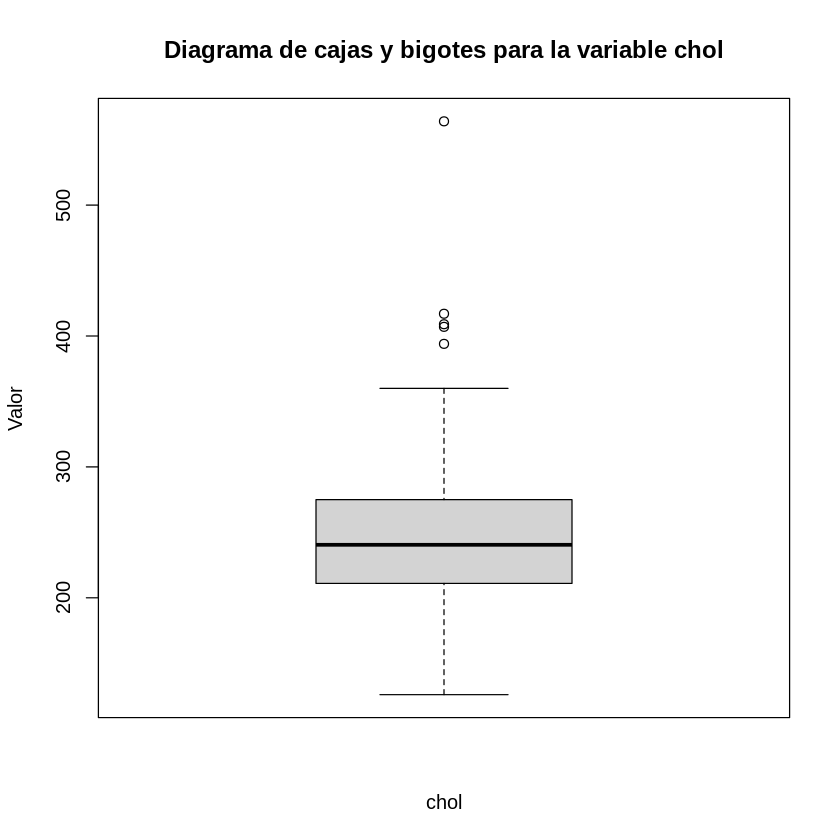

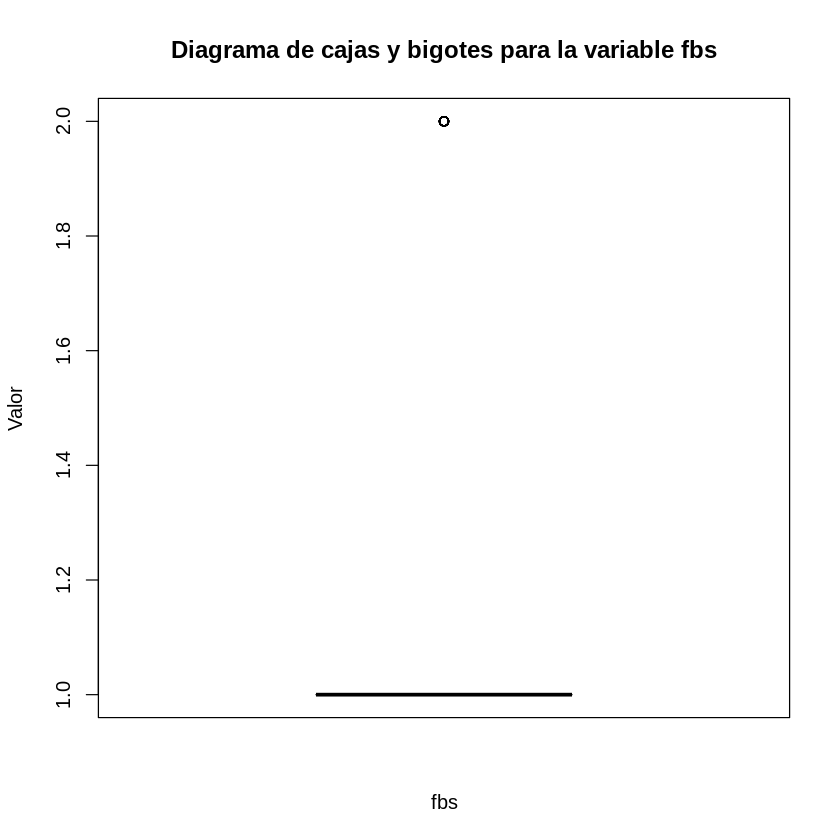

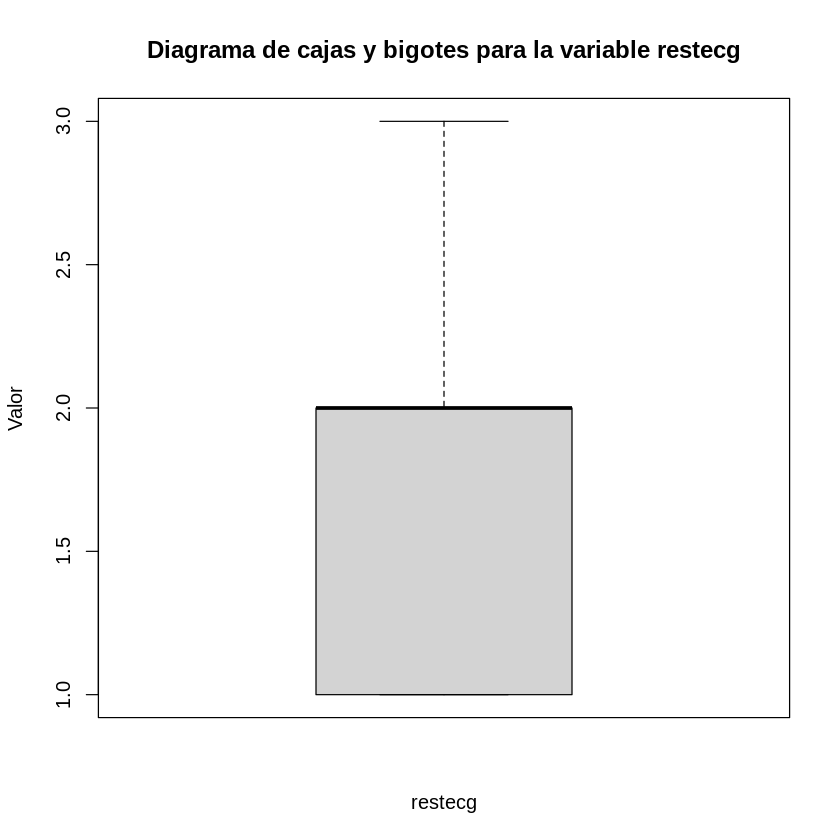

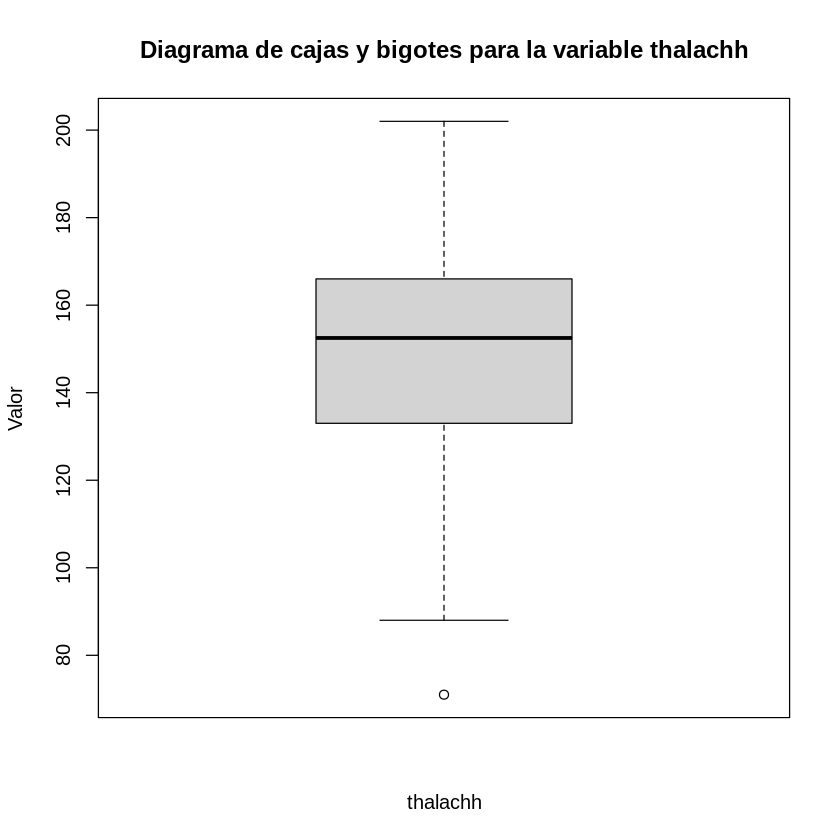

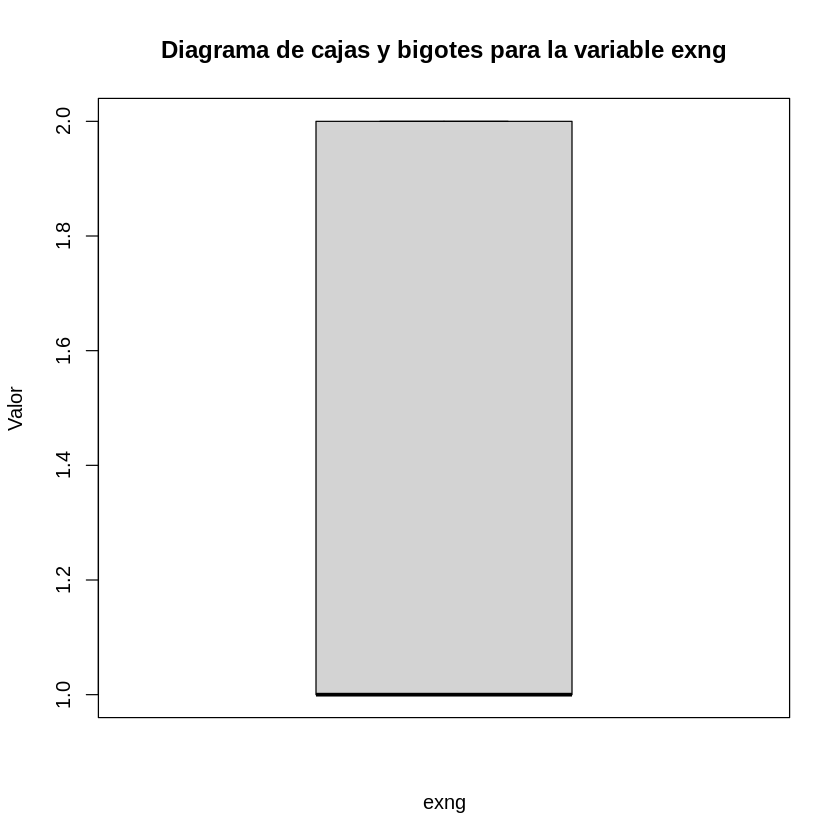

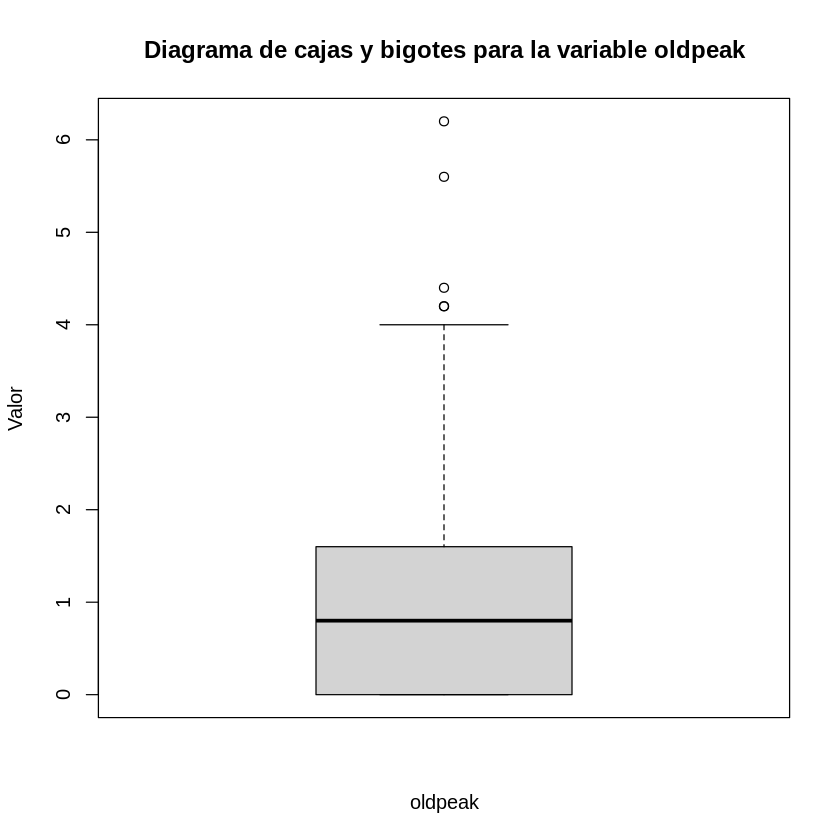

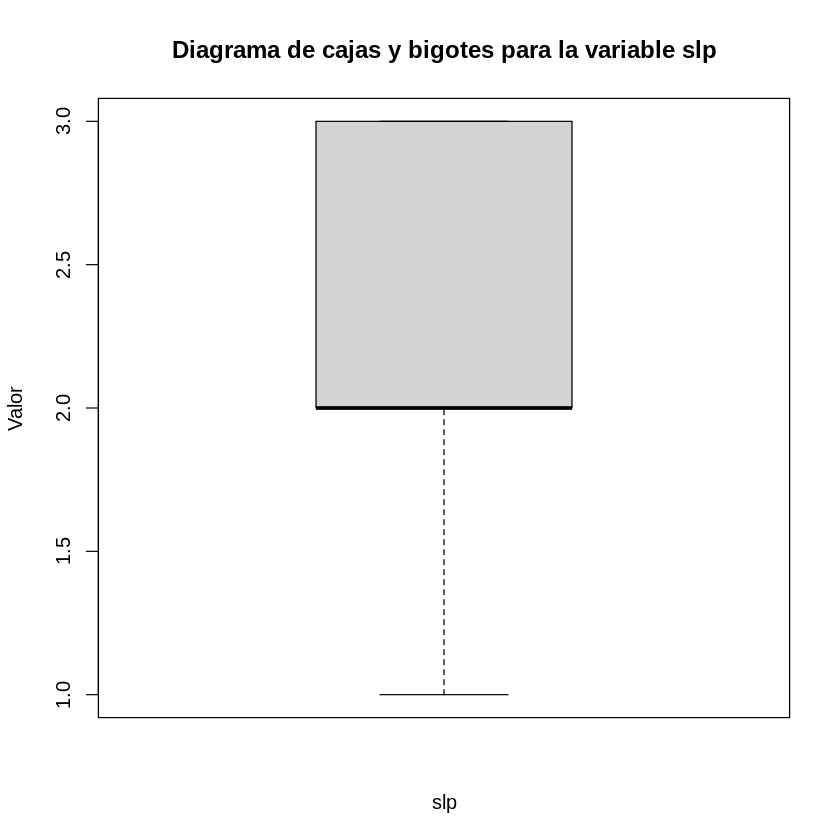

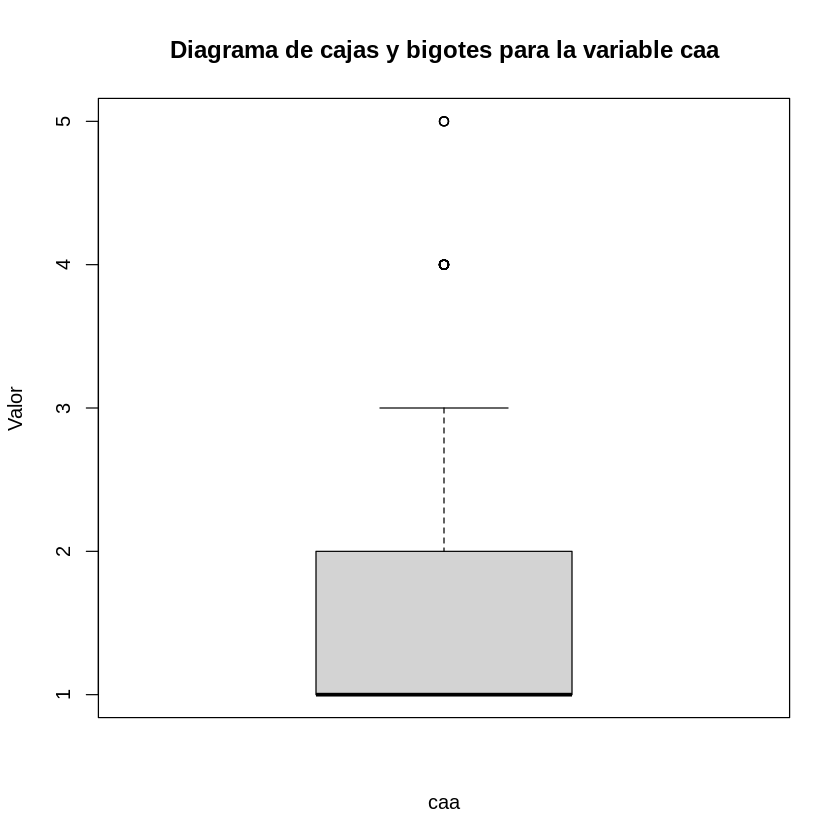

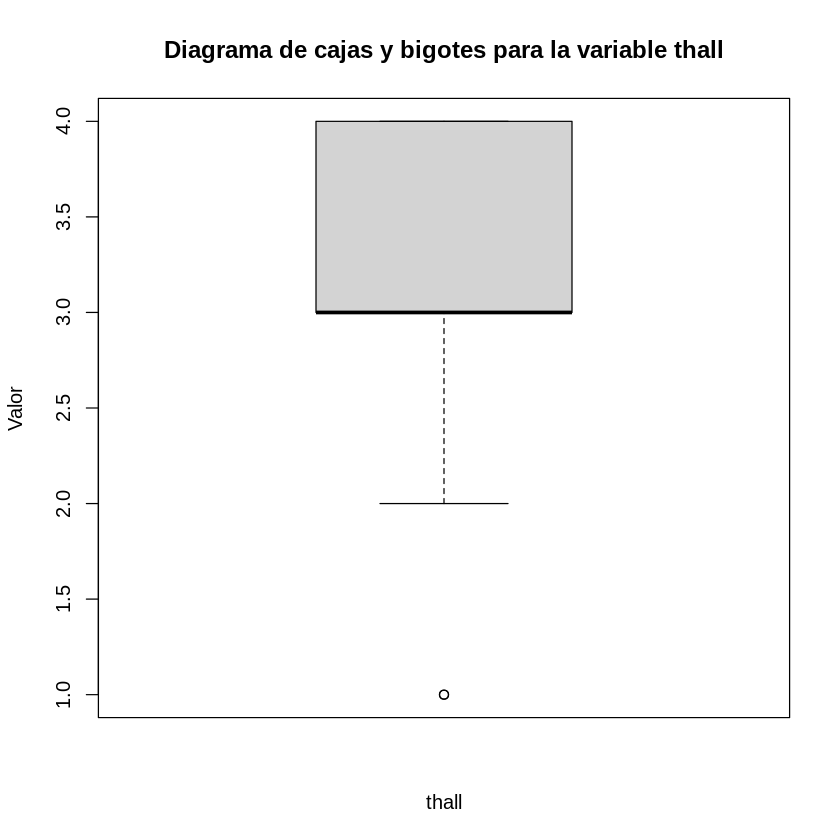

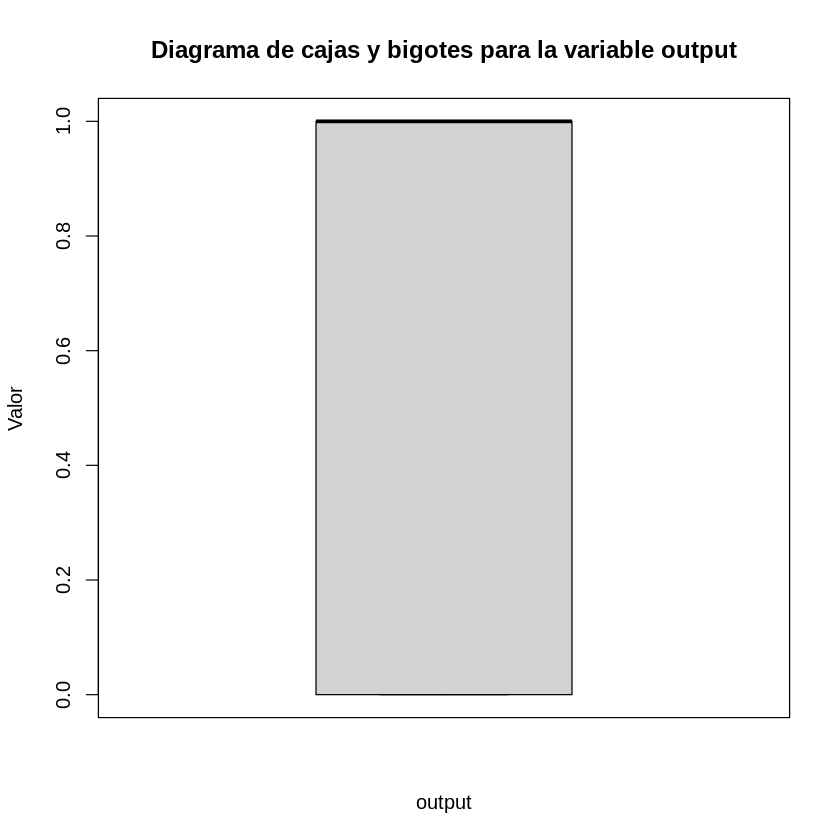

In [ ]:
# Obtener la lista de variables del dataframe
variables <- colnames(data)

# Crear el diagrama de cajas y bigotes para cada variable
for (variable in variables) {
  # Crear el diagrama de cajas y bigotes
  boxplot(data[, variable], 
          main = paste("Diagrama de cajas y bigotes para la variable", variable),
          xlab = variable,
          ylab = "Valor")
}

## Eliminar valores atipicos

In [87]:
# Convertir todas las variables excepto "fbs" a numéricas
non_fbs_columns <- colnames(data)[colnames(data) != "fbs"]
data[non_fbs_columns] <- sapply(data[non_fbs_columns], as.numeric)

# Calcular los límites de los valores atípicos para cada variable excepto "fbs"
q1 <- apply(data[non_fbs_columns], 2, quantile, probs = 0.25)
q3 <- apply(data[non_fbs_columns], 2, quantile, probs = 0.75)
iqr <- q3 - q1
upper <- q3 + 1.5 * iqr
lower <- q1 - 1.5 * iqr

# Identificar las filas que contienen valores atípicos en variables excepto "fbs"
outliers <- apply(data[non_fbs_columns], 1, function(x) any(x < lower | x > upper))

# Eliminar las filas con valores atípicos en variables excepto "fbs"
data <- data[!outliers, ]

## Analisis visual

Metodo generico para graficar

In [88]:
plot_percentages <- function(df, column_name, title) {
  # Crear un nuevo data frame con los conteos y porcentajes
  df_percent <- df %>%
    group_by(!!sym(column_name)) %>%
    summarise(count = n(), .groups = "drop") %>%
    mutate(percent = count / sum(count))
  
  # Crear el gráfico de barras
  ggplot(df_percent, aes(x = as.factor(!!sym(column_name)), y = percent, fill = as.factor(!!sym(column_name)))) +
    geom_bar(stat = "identity") +
    geom_text(aes(label = paste0(round(percent * 100, 1), "%")), vjust = -0.5) +
    geom_text(aes(label = count), position = position_stack(vjust = 0.5), color = "white") + # Agrega la cantidad de registros
    scale_y_continuous(labels = percent_format()) +
    scale_fill_brewer(palette = "Dark2") +
    theme_minimal() +
    ggtitle(title) +
    xlab(column_name) +
    ylab("Percent") +
    theme(plot.title = element_text(hjust = 0.5))
}


Al analizar la variable objetivo se observa un dataset balanceado, donde estan marcados como 0 los pacientes con menor probabilidad de infarto con un porcentaje de 45.7% y con 1 los pacientes con mayor probabilidad de enfermedad cardiaca con un porcentaje de 54.3%.

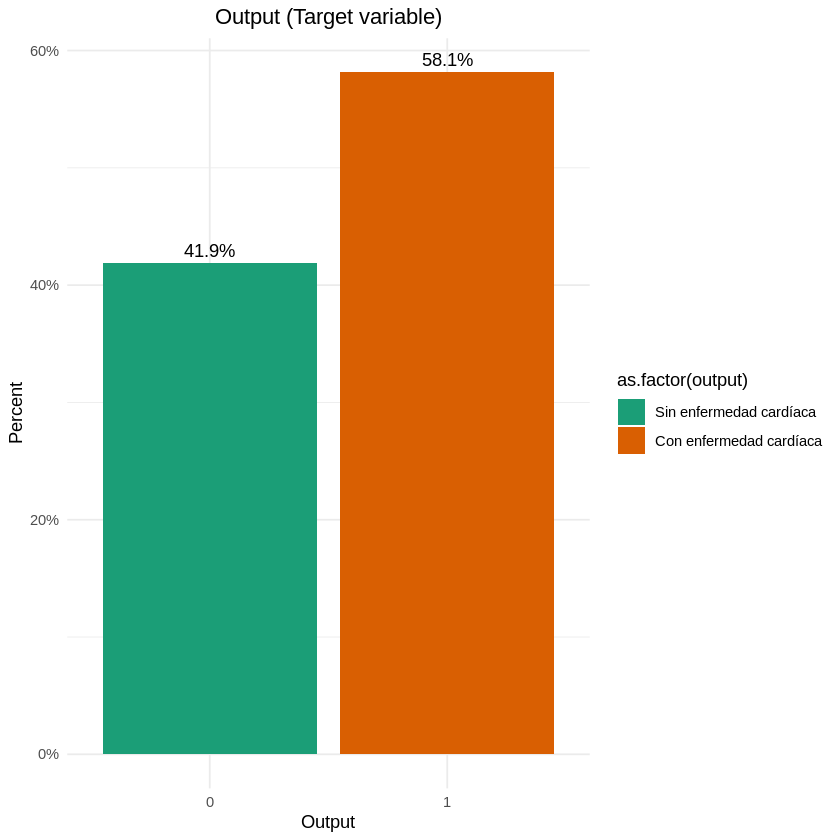

In [89]:
# Crear un nuevo data frame con los conteos y porcentajes
data_percent <- data %>%
  group_by(output) %>%
  summarise(count = n(), .groups = "drop") %>%
  mutate(percent = count / sum(count))

# Crear el gráfico de barras
ggplot(data_percent, aes(x = as.factor(output), y = percent, fill = as.factor(output))) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(round(percent * 100, 1), "%")), vjust = -0.5) +
  scale_y_continuous(labels = percent_format()) +
  scale_fill_brewer(palette = "Dark2", labels = c("Sin enfermedad cardíaca", "Con enfermedad cardíaca")) +
  theme_minimal() +
  ggtitle("Output (Target variable)") +
  xlab("Output") +
  ylab("Percent") +
  theme(plot.title = element_text(hjust = 0.5))

Genero: Los datos se distribuyen con una porcentaje de 31.8% para mujeres y un 68.2% para hombres.

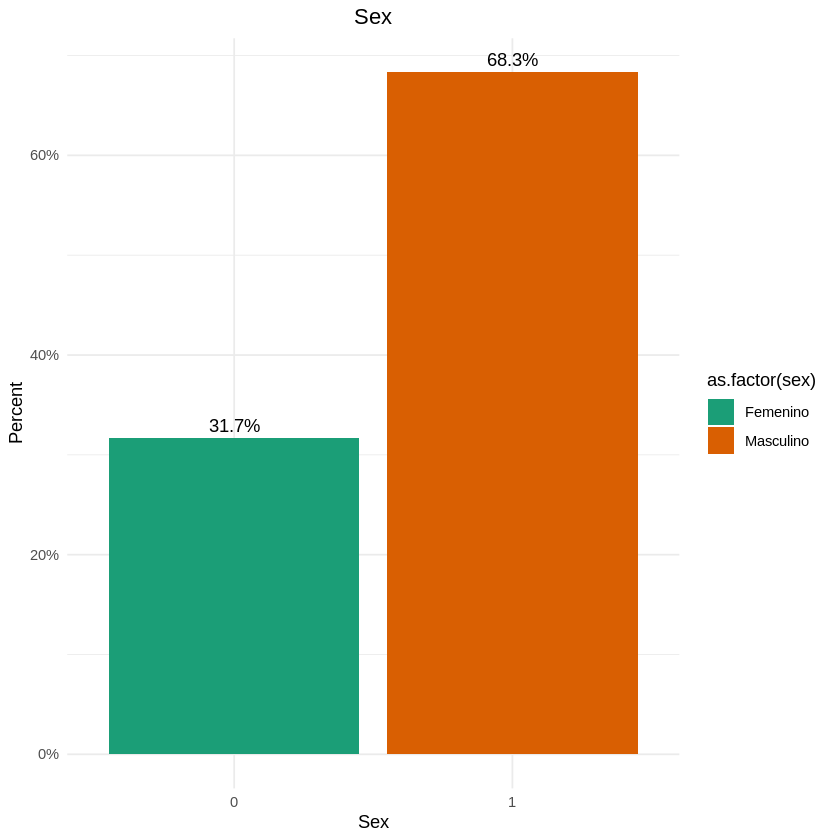

In [ ]:
# Crear un nuevo data frame con los conteos y porcentajes
data_percent <- data %>%
  group_by(sex) %>%
  summarise(count = n(), .groups = "drop") %>%
  mutate(percent = count / sum(count))

# Crear el gráfico de barras
ggplot(data_percent, aes(x = as.factor(sex), y = percent, fill = as.factor(sex))) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(round(percent * 100, 1), "%")), vjust = -0.5) +
  scale_y_continuous(labels = percent_format()) +
  scale_fill_brewer(palette = "Dark2", labels = c("Femenino", "Masculino")) +
  theme_minimal() +
  ggtitle("Sex") +
  xlab("Sex") +
  ylab("Percent") +
  theme(plot.title = element_text(hjust = 0.5))

Al analizar la relación entre el género y la presencia de enfermedad cardíaca, se puede observar que existe una mayor propensión en las mujeres a tener un mayor riesgo de padecerla. Por otro lado, en los hombres, prevalece la probabilidad de no tener enfermedad cardíaca. Sin embargo, se debe tener en cuenta que estas observaciones pueden estar influenciadas por la distribución de género en el conjunto de datos. Aunque es un dato interesante se debe  recordar que las relaciones observadas en los datos son puramente asociativas y no indican causalidad.

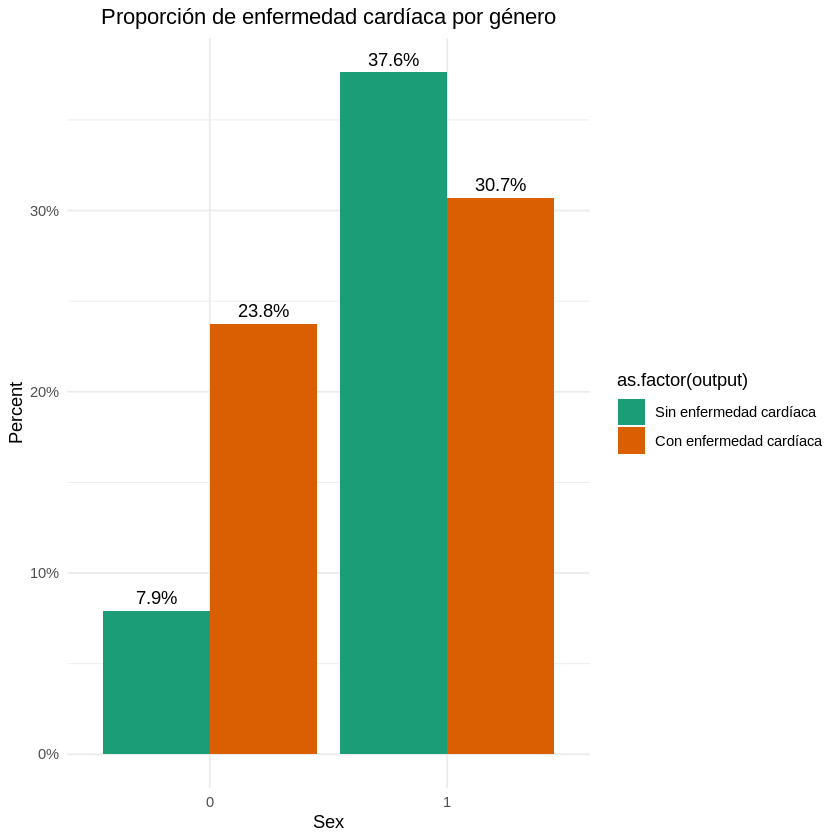

In [ ]:
# Crear un nuevo data frame con los conteos y porcentajes
data_percent <- data %>%
  group_by(sex, output) %>%
  summarise(count = n(), .groups = "drop") %>%
  mutate(percent = count / sum(count))

# Crear el gráfico de barras
ggplot(data_percent, aes(x = as.factor(sex), y = percent, fill = as.factor(output))) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_text(aes(label = paste0(round(percent * 100, 1), "%")), vjust = -0.5, position = position_dodge(0.9)) +
  scale_y_continuous(labels = scales::percent_format()) +
  scale_fill_brewer(palette = "Dark2", labels = c("Sin enfermedad cardíaca", "Con enfermedad cardíaca")) +
  theme_minimal() +
  ggtitle("Proporción de enfermedad cardíaca por género") +
  xlab("Sex") +
  ylab("Percent") +
  theme(plot.title = element_text(hjust = 0.5))

Edad: Para esta grafica los grupos con mayor cantidad de observaciones se presentan en un azul mas oscuro , destacando los grupos de edades de 53, 58 y 59.

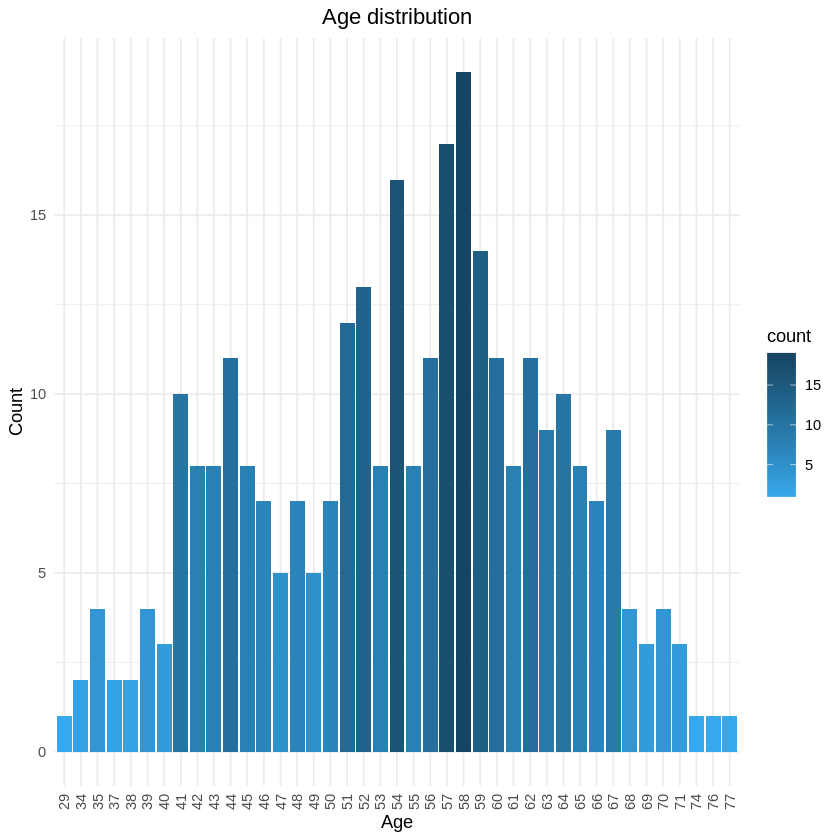

In [ ]:
# Crear el gráfico de conteo
ggplot(data, aes(x = as.factor(age), fill = ..count..)) +
  geom_bar() +
  scale_fill_gradient(low = "#36A8EB", high = "#164561") +
  theme_minimal() +
  ggtitle("Age distribution") +
  xlab("Age") +
  ylab("Count") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))


Correlación(entre mas oscuro mas correlación)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.00000000,-0.09496249,-0.06310659,0.28312068,0.2072155057,0.119492128,-0.11159006,-0.395235188,0.09321585,0.206039638,-0.1641242337,0.30226121,0.06531729,-0.22147583
sex,-0.09496249,1.00000000,-0.05173952,-0.05764694,-0.1955714449,0.046022181,-0.06035051,-0.046438663,0.14346012,0.098321733,-0.0329896331,0.11306039,0.21145220,-0.28360936
cp,-0.06310659,-0.05173952,1.00000000,0.04648642,-0.0726816082,0.096018104,0.04156100,0.293366582,-0.39293737,-0.146692247,0.1168541942,-0.19535634,-0.16036963,0.43207959
trtbps,0.28312068,-0.05764694,0.04648642,1.00000000,0.1252562856,0.178124692,-0.11536656,-0.048022712,0.06852626,0.194599950,-0.1228729284,0.09924834,0.06286958,-0.14626866
chol,0.20721551,-0.19557144,-0.07268161,0.12525629,1.0000000000,0.011428297,-0.14760177,-0.005308496,0.06409890,0.050086024,0.0004166583,0.08687794,0.09681045,-0.08143720
fbs,0.11949213,0.04602218,0.09601810,0.17812469,0.0114282965,1.000000000,-0.08308108,-0.007169290,0.02472879,0.004514275,-0.0586535414,0.14493475,-0.03275238,-0.02682597
restecg,-0.11159006,-0.06035051,0.04156100,-0.11536656,-0.1476017717,-0.083081081,1.00000000,0.041209808,-0.06880655,-0.056250714,0.0904021525,-0.08311244,-0.01047317,0.13487445
thalachh,-0.39523519,-0.04643866,0.29336658,-0.04802271,-0.0053084958,-0.007169290,0.04120981,1.000000000,-0.37741145,-0.342200746,0.3847543806,-0.22831108,-0.09490994,0.41995504
exng,0.09321585,0.14346012,-0.39293737,0.06852626,0.0640988995,0.024728793,-0.06880655,-0.377411449,1.00000000,0.286766336,-0.2561062438,0.12537710,0.20582566,-0.43560076
oldpeak,0.20603964,0.09832173,-0.14669225,0.19459995,0.0500860240,0.004514275,-0.05625071,-0.342200746,0.28676634,1.000000000,-0.5763143815,0.23656044,0.20909049,-0.42914583


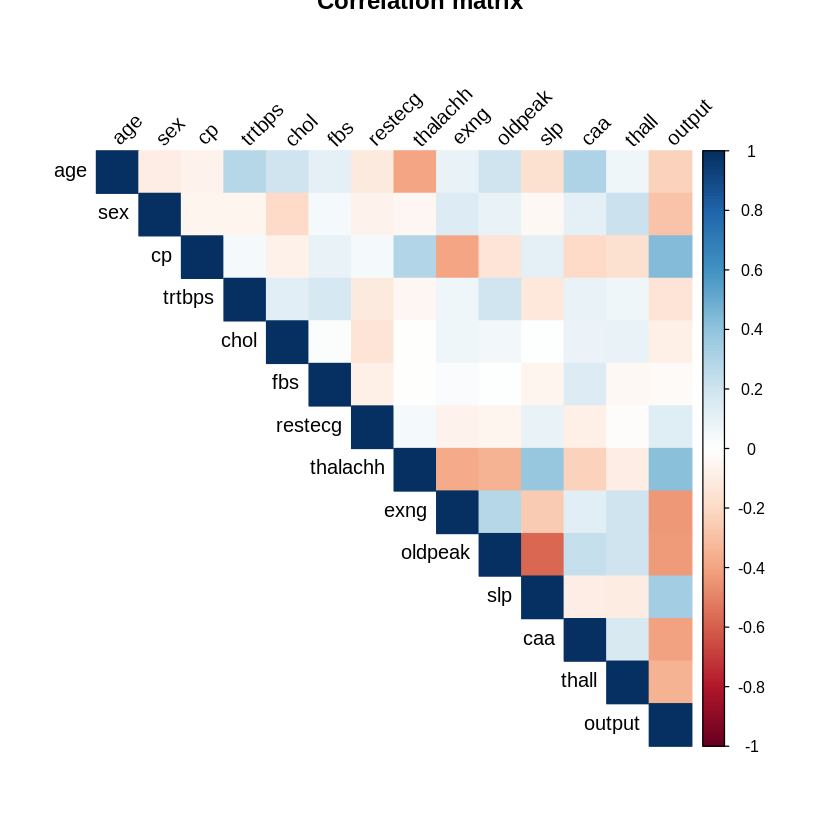

In [ ]:
# Calcular la matriz de correlación
cor_matrix <- cor(data)

# Crear el mapa de calor
corrplot(cor_matrix, method = "color", type = "upper", 
         title = "Correlation matrix", tl.col = "black", tl.srt = 45)

cor_matrix

Algunas observaciones interesantes de la matriz de correlación:

* "cp" (tipo de dolor en el pecho) y "output" (diagnóstico de enfermedad cardíaca) tienen una correlación positiva de 0.43. Esto sugiere que los pacientes con ciertos tipos de dolor en el pecho tienen más probabilidades de tener una enfermedad cardíaca.

* "thalachh" (frecuencia cardíaca máxima alcanzada) y "output" también tienen una correlación positiva de 0.42, lo que sugiere que los pacientes que alcanzan una frecuencia cardíaca más alta tienen más probabilidades de tener una enfermedad cardíaca.

* "exng" (angina inducida por el ejercicio) y "output" tienen una correlación negativa de -0.44, lo que sugiere que los pacientes que experimentan angina durante el ejercicio tienen menos probabilidades de tener una enfermedad cardíaca.

* "oldpeak" (depresión del ST inducida por el ejercicio en relación con el reposo) y "output" tienen una correlación negativa de -0.43, lo que sugiere que los pacientes que experimentan una mayor depresión del ST durante el ejercicio tienen menos probabilidades de tener una enfermedad cardíaca.

* "caa" (número de vasos sanguíneos coloreados por fluoroscopia) y "output" tienen una correlación negativa de -0.41, lo que sugiere que los pacientes con más vasos sanguíneos coloreados tienen menos probabilidades de tener una enfermedad cardíaca.

Tipo de Dolor de Pecho: La angina típica (0) es la más común, con 143 casos, seguida de la angina no anginal (2) con 86 casos, la angina atípica (1) con 50 casos, y finalmente la más baja es la asintomática (3) con solo 23 casos.

Además, se puede observar que las personas con angina típica (0) representan el 46% de todas las personas en el estudio.

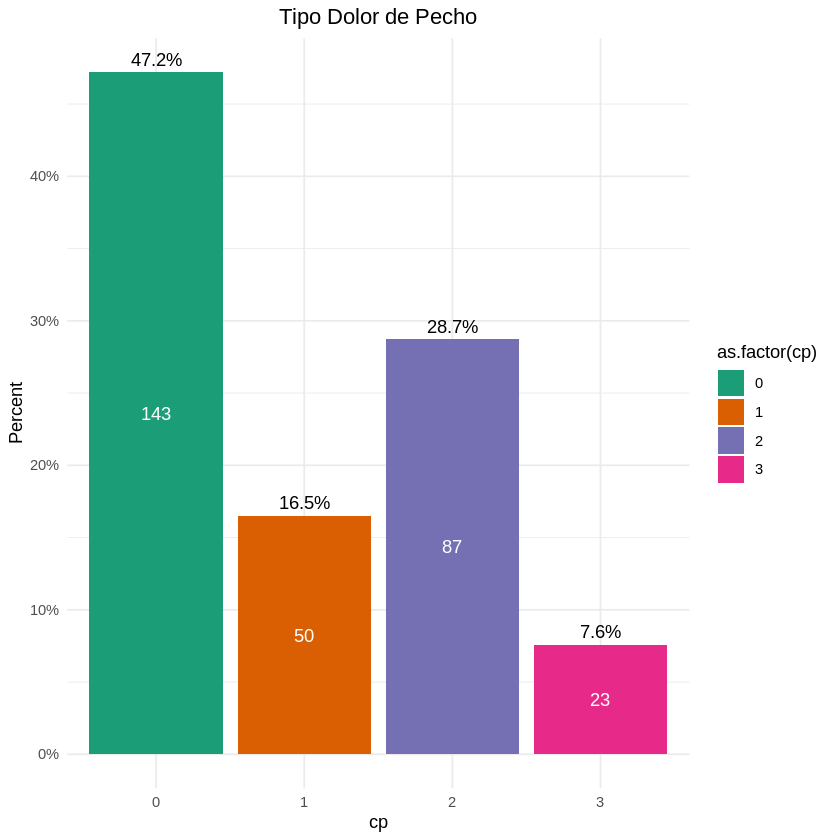

In [ ]:
plot_percentages(data, 'cp', 'Tipo Dolor de Pecho')

Glicemia en ayunas: Mientras que 257 personas tenían una glucemia inferior a 120 mg/dl, 45 tenían una glucemia superior a la normal.

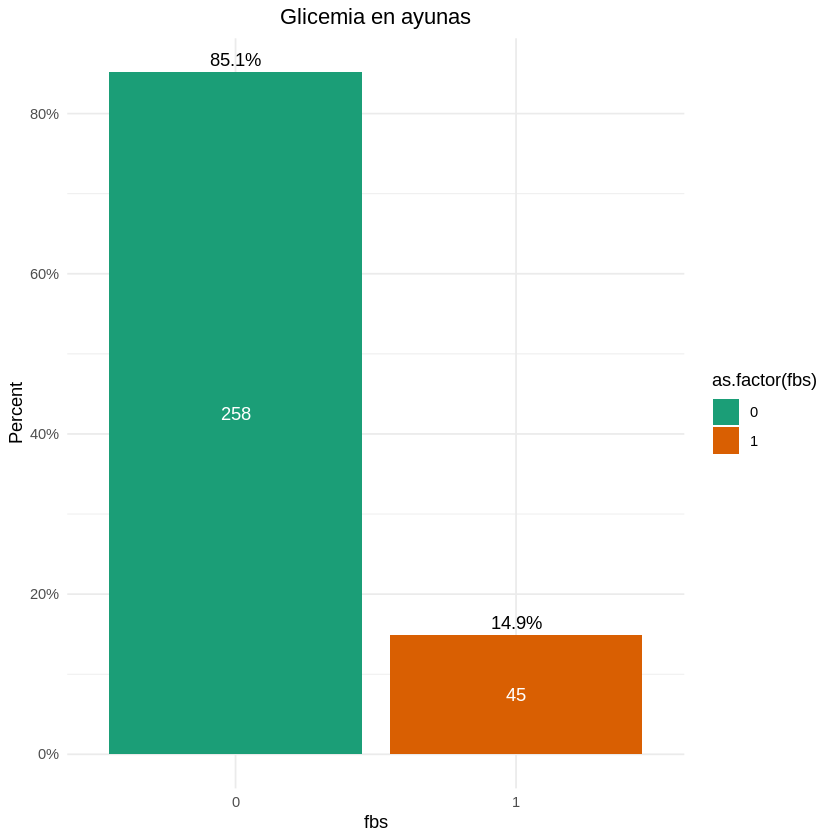

In [ ]:
plot_percentages(data, 'fbs', 'Glicemia en ayunas')

Resultados Electrocardiogramas en reposo: 151 personas presentaron normalidad en la onda ST-T (1), 147 personas fueron catalogadas como normales (0) y 4 personas presentaron hipertrofia ventricular izquierda (2)

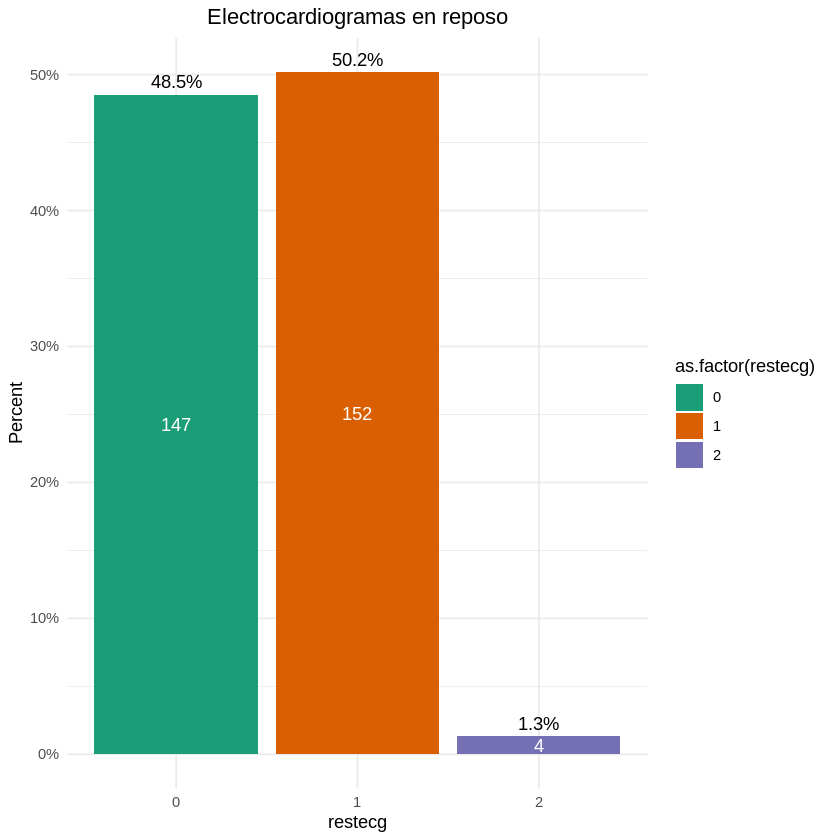

In [ ]:
plot_percentages(data, 'restecg', 'Electrocardiogramas en reposo')

Angina inducida por el ejercicio: Solo el 32.7% presento angina a causa del esfuerzo fisico contra un 67.3% que no presentaron.

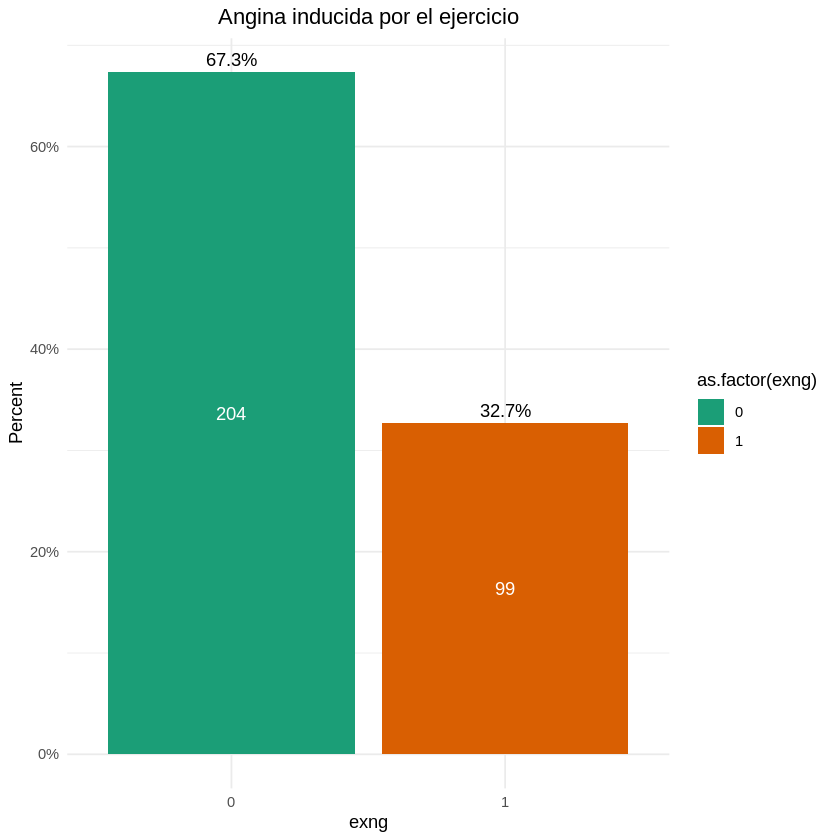

In [ ]:
plot_percentages(data, 'exng', 'Angina inducida por el ejercicio')

Presión arterial en reposo: La tensión arterial ideal se considera entre 90/60mmHg y 120/80mmH. ¿¿Los datos tienden a tener una distrubicón normal??

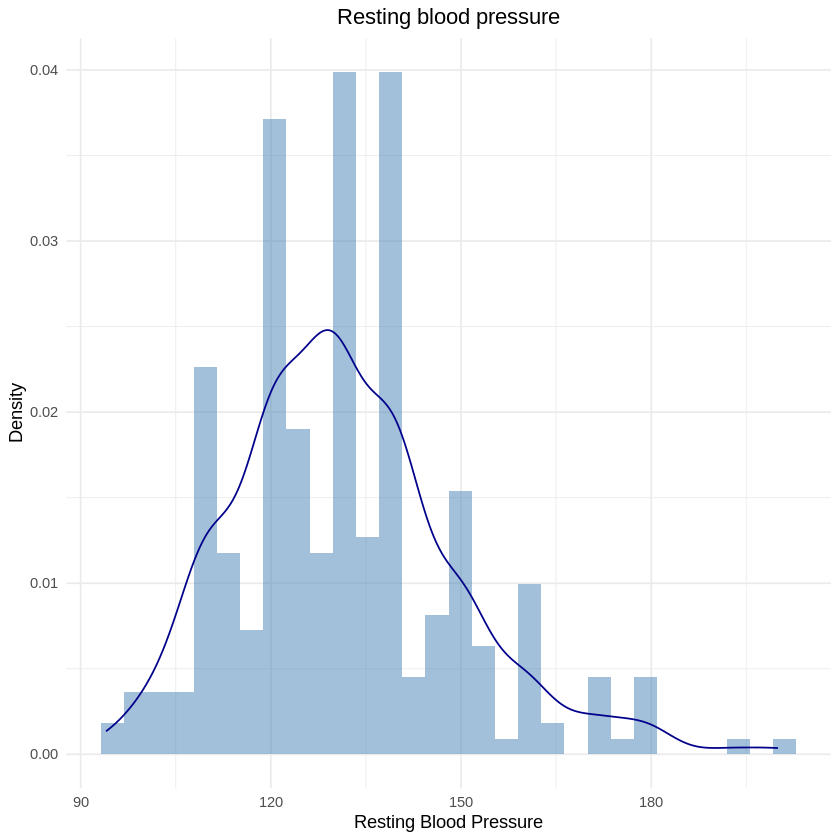

In [ ]:
ggplot(data, aes(x = trtbps)) + 
  geom_histogram(aes(y = ..density..), bins = 30, fill = "steelblue", alpha = 0.5) +
  geom_density(alpha = 0.7, colour = "darkblue") +
  theme_minimal() +
  ggtitle("Resting blood pressure") +
  xlab("Resting Blood Pressure") +
  ylab("Density") +
  theme(plot.title = element_text(hjust = 0.5))

Colesterol: Como regla  general se considera un valor normal cuando el colesterol esta por debajo de 200; aunque esto puede variar dependiendo del genero y otros factores.

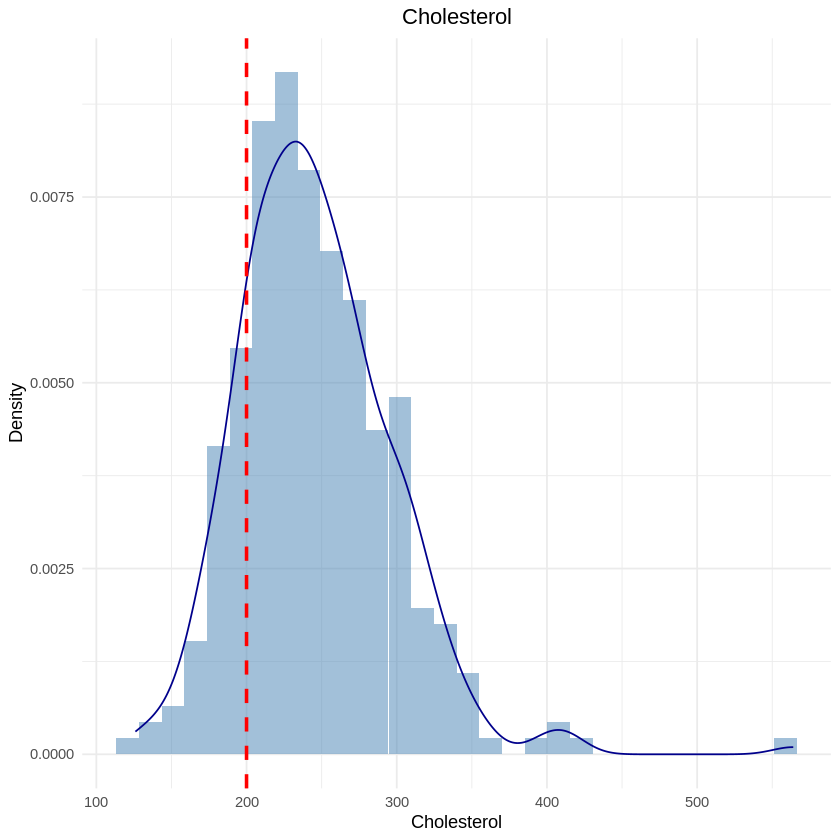

In [ ]:
ggplot(data, aes(x = chol)) + 
  geom_histogram(aes(y = after_stat(density)), bins = 30, fill = "steelblue", alpha = 0.5) +
  geom_density(alpha = 0.7, colour = "darkblue") +
  geom_vline(aes(xintercept=200), color="red", linetype="dashed", linewidth=1) +
  theme_minimal() +
  ggtitle("Cholesterol") +
  xlab("Cholesterol") +
  ylab("Density") +
  theme(plot.title = element_text(hjust = 0.5))

Thalachh: La frecuencia cardíaca máxima se basa en su edad, para estimar su frecuencia cardíaca máxima relacionada con la edad, reste su edad de 220.

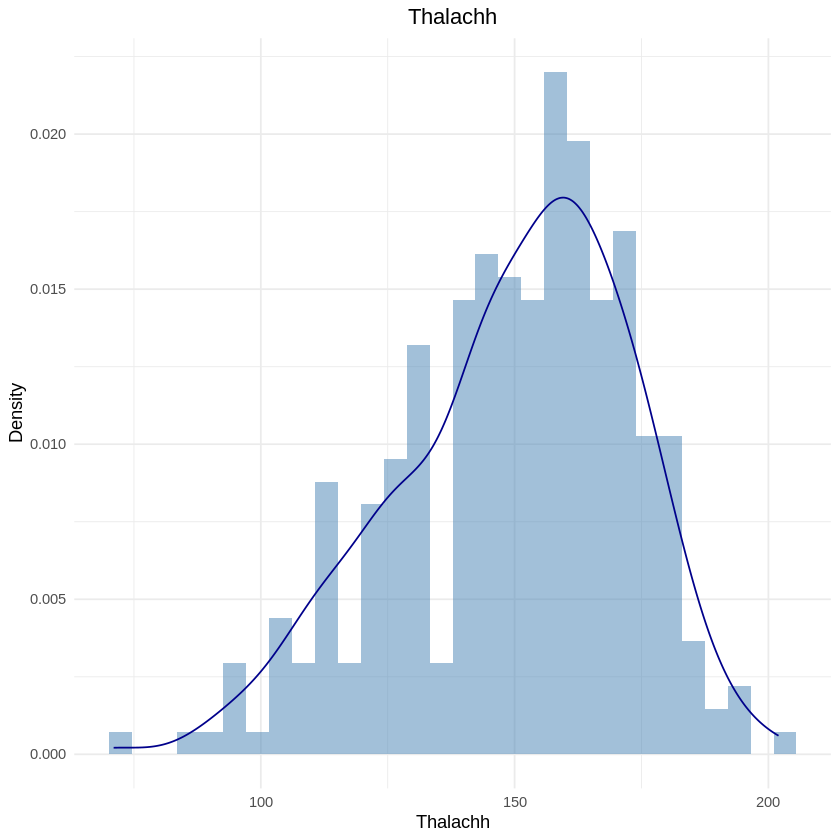

In [ ]:
ggplot(data, aes(x = thalachh)) + 
  geom_histogram(aes(y = ..density..), bins = 30, fill = "steelblue", alpha = 0.5) +
  geom_density(alpha = 0.7, colour = "darkblue") +
  theme_minimal() +
  ggtitle("Thalachh") +
  xlab("Thalachh") +
  ylab("Density") +
  theme(plot.title = element_text(hjust = 0.5))

Diving deep: Los ataques cardíacos son más probables entre los 40 y los 55 años.

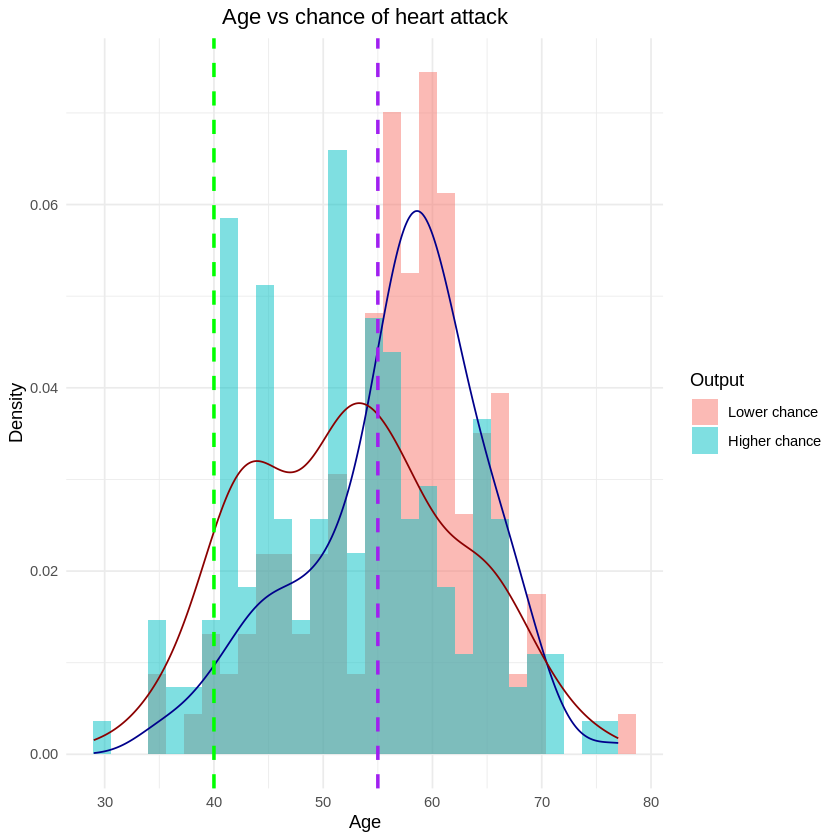

In [ ]:
# Crear el histograma
ggplot(data, aes(x = age, fill = as.factor(output))) + 
  geom_histogram(position = "identity", alpha = 0.5, bins = 30, aes(y = ..density..)) +
  geom_density(data = data[data$output == 0, ], aes(x = age), fill = NA, colour = "darkblue", alpha = 1) +
  geom_density(data = data[data$output == 1, ], aes(x = age), fill = NA, colour = "darkred", alpha = 1) +
  geom_vline(aes(xintercept = 40), colour = "green", linetype = "dashed", size = 1) +
  geom_vline(aes(xintercept = 55), colour = "purple", linetype = "dashed", size = 1) +
  theme_minimal() +
  ggtitle("Age vs chance of heart attack") +
  xlab("Age") +
  ylab("Density") +
  scale_fill_discrete(name = "Output", labels = c("Lower chance", "Higher chance")) +
  theme(plot.title = element_text(hjust = 0.5))


Hay un aumento en la presión arterial en reposo a medida que envejece.

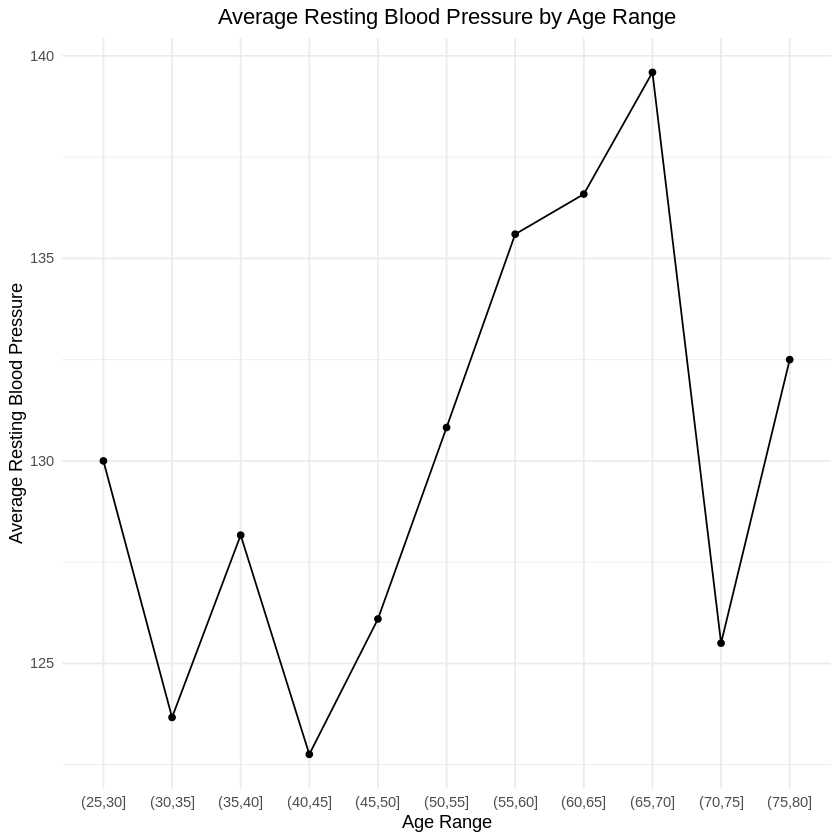

In [ ]:
# Analisis en rangos de 5 años
data$age_range <- cut(data$age, breaks = seq(20, 80, by = 5))

# calculamos la presión arterial media para cada rango de edad
average_bps <- data %>%
  group_by(age_range) %>%
  summarise(mean_trtbps = mean(trtbps, na.rm = TRUE))

# Graficar promedios
ggplot(average_bps, aes(x = age_range, y = mean_trtbps)) + 
  geom_point() +
  geom_line(group = 1) +
  theme_minimal() +
  ggtitle("Average Resting Blood Pressure by Age Range") +
  xlab("Age Range") +
  ylab("Average Resting Blood Pressure") +
  theme(plot.title = element_text(hjust = 0.5))


Hay un aumento en el colesterol a medida que se envejece, pero no parece haber una relación en una mayor probabilidad de ataque cardíaco con un aumento en el colesterol y la edad.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


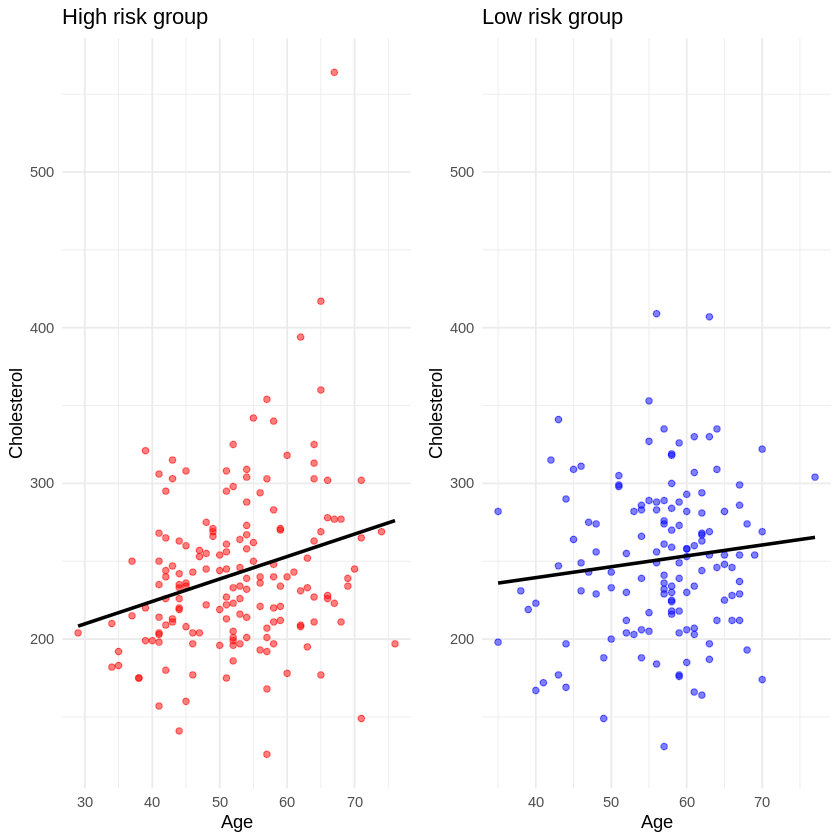

In [ ]:
# Divide el dataset en dos basado en el valor de 'output'
data_high_risk <- data[data$output == 1, ]
data_low_risk <- data[data$output == 0, ]

# Igualar informacion eje y
y_min <- min(min(data_high_risk$chol, na.rm = TRUE), min(data_low_risk$chol, na.rm = TRUE))
y_max <- max(max(data_high_risk$chol, na.rm = TRUE), max(data_low_risk$chol, na.rm = TRUE))


# Scatter plot para el grupo de alto riesgo
plot_high_risk <- ggplot(data_high_risk, aes(x = age, y = chol)) +
  geom_point(alpha = 0.5, colour = "red") +
  geom_smooth(method = "lm", se = FALSE, colour = "black") +
  ggtitle("High risk group") +
  xlab("Age") +
  ylab("Cholesterol") +
  ylim(y_min, y_max) +
  theme_minimal()

# Scatter plot para el grupo de bajo riesgo
plot_low_risk <- ggplot(data_low_risk, aes(x = age, y = chol)) +
  geom_point(alpha = 0.5, colour = "blue") +
  geom_smooth(method = "lm", se = FALSE, colour = "black") +
  ggtitle("Low risk group") +
  xlab("Age") +
  ylab("Cholesterol") +
  ylim(y_min, y_max) +
  theme_minimal()

grid.arrange(plot_high_risk, plot_low_risk, ncol = 2)
